In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('driver-data.csv')
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mean_dist_day'>

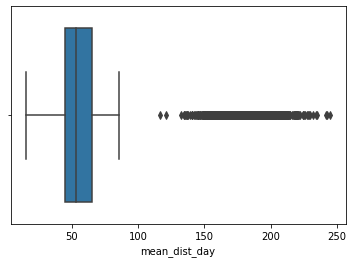

In [4]:
sns.boxplot(data['mean_dist_day'])

In [5]:
data.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [7]:
data.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [8]:
features = data.drop(['id'], axis = 1)
features.shape

(4000, 2)

In [9]:
from sklearn.cluster import KMeans

In [27]:
my_cluster_model = KMeans(n_clusters=2)

In [28]:
my_cluster_model.fit(features)

KMeans(n_clusters=2)

In [29]:
np.unique(my_cluster_model.labels_)

array([0, 1], dtype=int32)

In [30]:
import seaborn as sns

In [31]:
data['cluster'] = my_cluster_model.labels_

In [32]:
data.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc', 'cluster'], dtype='object')

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


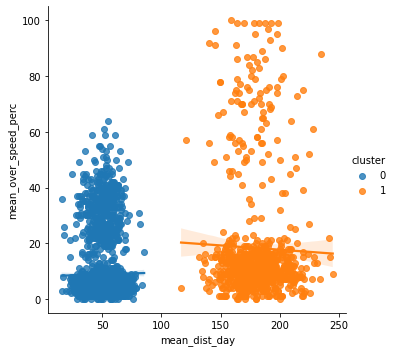

In [33]:
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=data,hue='cluster');

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


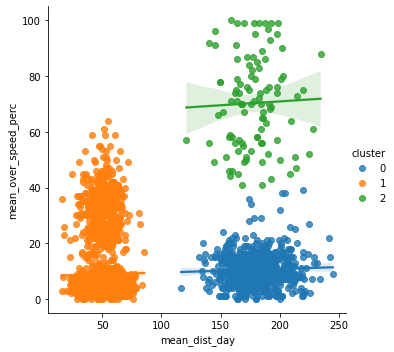

In [34]:
my_cluster_model = KMeans(n_clusters=3)
my_cluster_model.fit(features)
data['cluster'] = my_cluster_model.labels_
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=data,hue='cluster');

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


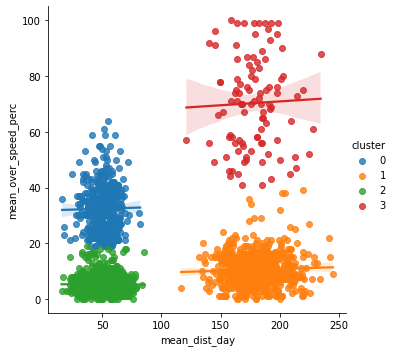

In [37]:
my_cluster_model = KMeans(n_clusters=4)
my_cluster_model.fit(features)
data['cluster'] = my_cluster_model.labels_
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=data,hue='cluster');

In [36]:
my_cluster_model.cluster_centers_

array([[ 49.98428468,   5.21441441],
       [180.34311782,  10.52011494],
       [ 50.46127059,  32.42823529],
       [177.83509615,  70.28846154]])

In [34]:
my_cluster_model.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [25]:
data.set_index('id').reset_index()

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


In [17]:
data = pd.DataFrame({'Gender' : ['Male', 'Female', 'Female', 'Male', 'Male']})
data

,Gender
0,Male
1,Female
2,Female
3,Male
4,Male


In [18]:
pd.get_dummies(data['Gender'])

,Female,Male
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1


In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit_transform(data[['Gender']])

<5x2 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [26]:
enc.transform(data[['Gender']]).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])